Saving ab_test_data.csv to ab_test_data (1).csv
Shape of dataset: (5000, 7)

Sample rows:


,user_id,group,page_version,clicked,purchased,time_on_page,country
0,1,A,old,0,0,34.03,UK
1,2,B,new,0,0,48.47,India
2,3,B,new,0,0,35.12,India
3,4,B,new,0,0,43.53,Australia
4,5,A,old,0,0,45.38,USA



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       5000 non-null   int64  
 1   group         5000 non-null   object 
 2   page_version  5000 non-null   object 
 3   clicked       5000 non-null   int64  
 4   purchased     5000 non-null   int64  
 5   time_on_page  5000 non-null   float64
 6   country       5000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 273.6+ KB

Summary statistics:


,user_id,clicked,purchased,time_on_page
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.280000,0.104800,42.462134
std,1443.520003,0.449044,0.306326,10.340182
min,1.000000,0.000000,0.000000,5.000000
25%,1250.750000,0.000000,0.000000,35.657500
50%,2500.500000,0.000000,0.000000,42.405000
75%,3750.250000,1.000000,0.000000,49.392500
max,5000.000000,1.000000,1.000000,77.840000



Group-level summary:


,group,clicked,purchased,time_on_page,ctr_%,conversion_%
0,A,0.2504,0.0836,40.012316,25.04,8.36
1,B,0.3096,0.1260,44.911952,30.96,12.60


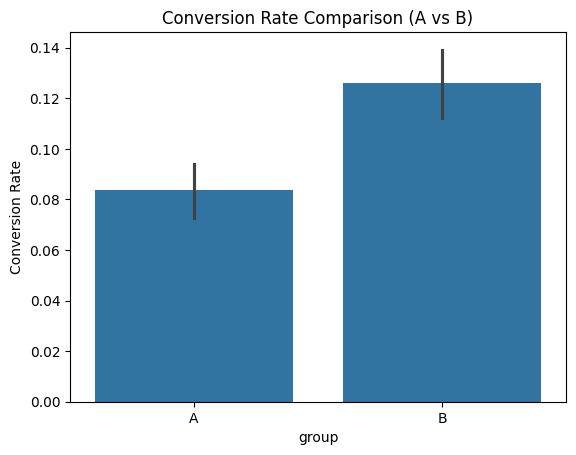


T-statistic: -4.905
P-value: 1e-06

✅ Result is statistically significant!
=> The new design (Group B) performs better with 95% confidence.


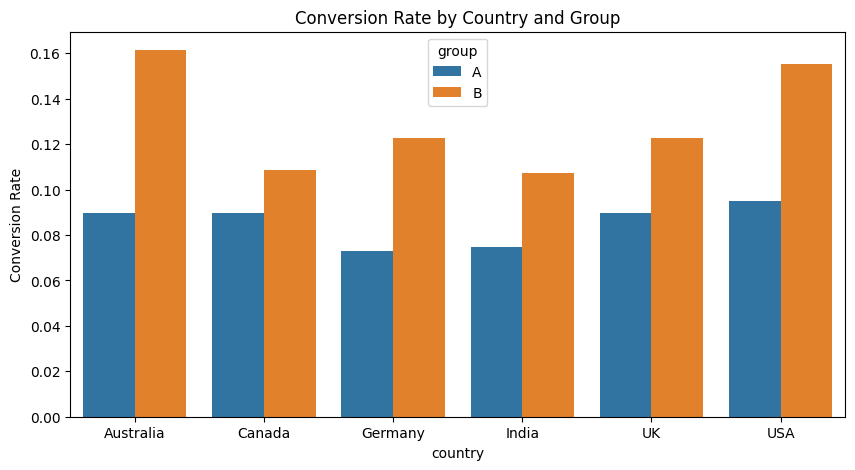

In [1]:
# ==========================================
# 📘 A/B Test Analyst Project — Step 5
# Author: Shlok Dhareshwar
# ==========================================

# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2️⃣ Load the Dataset ---
# Upload the CSV file you downloaded earlier (ab_test_data.csv)
# In Colab, run this cell, then click the file upload icon to select your file.
from google.colab import files
uploaded = files.upload()

# Now load the uploaded CSV
df = pd.read_csv("ab_test_data.csv")

# --- 3️⃣ Quick Overview ---
print("Shape of dataset:", df.shape)
print("\nSample rows:")
display(df.head())

print("\nColumn info:")
df.info()

# --- 4️⃣ Basic Summary Stats ---
print("\nSummary statistics:")
display(df.describe())

# --- 5️⃣ Group-level Comparison ---
group_summary = df.groupby('group')[['clicked', 'purchased', 'time_on_page']].mean().reset_index()
group_summary['ctr_%'] = group_summary['clicked'] * 100
group_summary['conversion_%'] = group_summary['purchased'] * 100

print("\nGroup-level summary:")
display(group_summary)

# --- 6️⃣ Visualization: Conversion Rate by Group ---
sns.barplot(x='group', y='purchased', data=df, estimator=np.mean)
plt.title("Conversion Rate Comparison (A vs B)")
plt.ylabel("Conversion Rate")
plt.show()

# --- 7️⃣ T-test for Statistical Significance ---
group_a = df[df['group'] == 'A']['purchased']
group_b = df[df['group'] == 'B']['purchased']

t_stat, p_value = stats.ttest_ind(group_a, group_b)

print("\nT-statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 6))

# --- 8️⃣ Interpretation ---
if p_value < 0.05:
    print("\n✅ Result is statistically significant!")
    print("=> The new design (Group B) performs better with 95% confidence.")
else:
    print("\n❌ Result is NOT statistically significant.")
    print("=> The improvement could be due to random chance.")

# --- 9️⃣ Optional: Country-wise Conversion Comparison ---
country_conv = df.groupby(['country', 'group'])['purchased'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='country', y='purchased', hue='group', data=country_conv)
plt.title("Conversion Rate by Country and Group")
plt.ylabel("Conversion Rate")
plt.show()
